<a href="https://colab.research.google.com/github/sora3765/regression-analysis-sales-forecast/blob/main/1_3_%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E9%81%B8%E6%8A%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline


In [2]:
!git clone https://github.com/umacchi/python-regression-tutorial-data datasets

Cloning into 'datasets'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 31 (delta 3), reused 30 (delta 2), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [3]:
df = pd.read_csv("/content/datasets/test.csv")
n = len(df)
print(df.shape)
df.head()


(20, 4)


,monday_sales,week_sales,customer_traffic,weather
0,4.2,67,7.2,Sunny
1,7.2,71,7.9,Cloudy
2,2.0,30,5.3,Sunny
3,3.0,35,6.8,Rainy
4,1.5,35,7.5,Rainy


In [4]:
# ３つのモデルのどれが良いの？

# 当てはまりが良くても、予測が当てはまらない場合　→　過学習


x = np.array(df["monday_sales"])
y = np.array(df['week_sales'])
p = 1



In [5]:
formula = "week_sales ~ monday_sales"
result = smf.ols(formula, df).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             week_sales   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     33.24
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.83e-05
Time:                        01:01:54   Log-Likelihood:                -76.423
No. Observations:                  20   AIC:                             156.8
Df Residuals:                      18   BIC:                             158.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       23.7942      4.999      4.759      0.000      13.291      34.298
monday_sales     6.5009      1.128      5.766      0.000       4.132       8.870
==============================================================================
Omnibus:                        2.137   Durbin-Watson:                   1.471
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                1.783
Skew:                           0.662   Prob(JB):                        0.410
Kurtosis:                       2.377   Cond. No.                         8.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# モデルの予測値を算出
y_hat = np.array(result.fittedvalues)
y_hat


array([51.098, 70.601, 36.796, 43.297, 33.545, 29.645, 36.146, 46.547,
       49.798, 58.899, 51.098, 68.65 , 36.796, 81.002, 25.744, 67.35 ,
       51.098, 60.199, 32.895, 36.796])

In [7]:
eps_hat = np.array(result.resid)
eps_hat

array([ 15.902,   0.399,  -6.796,  -8.297,   1.455,  10.355, -13.146,
        -9.547, -10.798,  -3.899, -11.098,   1.35 ,  -7.796,   6.998,
        21.256,   9.65 ,   0.902,  -5.199, -14.895,  23.204])

In [8]:
np.sum(eps_hat ** 2)
# 出力結果
# 2440.957


2440.957291720378

In [9]:
# ================================================

In [10]:
# 全変動を求める
total_var = np.sum((y - np.mean(y))**2)

# 回帰変動を求める
exp_var = np.sum((y_hat - np.mean(y))**2)

# 誤差変動を求める
unexp_var = np.sum(eps_hat**2)


In [11]:
# 全変動 = 回帰変動 + 残差変動
total_var, exp_var + unexp_var
# 出力結果
# (6948.800, 6948.800)


(6948.8, 6948.799999999997)

In [12]:
# 週間売上 ~ monday_sales : 0.649
# 週間売上 ~ monday_sales + customer traffic : 0.737
# 週間売上 ~ monday_sales + customer traffic + weather : 0.764

In [13]:
1- (unexp_var / (n - p - 1) / (total_var / (n - 1)))
# 出力結果
# 0.629


0.6292070529948641

In [14]:
# 週間売上 ~ monday_sales + customer traffic : 0.706
# 自由度調整済み決定係数

In [15]:
# F検定
f = (exp_var / p) / (unexp_var / (n - p - 1))
f
# 出力結果
# 33.242


33.241535615662144

In [16]:
rv = stats.f(p, n - p - 1)
1 - rv.cdf(f)
# 出力結果
# 0.000

1.8280242664370228e-05

In [17]:
# ========================================================

In [19]:
prob = 0.3 # 表が出る確率
coin_result = [0, 1, 0, 0, 1] # 0が裏、1が表

# ベルヌーイ分布
rv = stats.bernoulli(prob)
probs = rv.pmf(coin_result)
print(probs)
# 出力結果
# [0.7 0.3 0.7 0.7 0.3]
# 0(裏)が出る確率は、0.7

L = np.prod(probs)
L
# 出力結果
# 0.031

[0.7 0.3 0.7 0.7 0.3]


0.030869999999999995

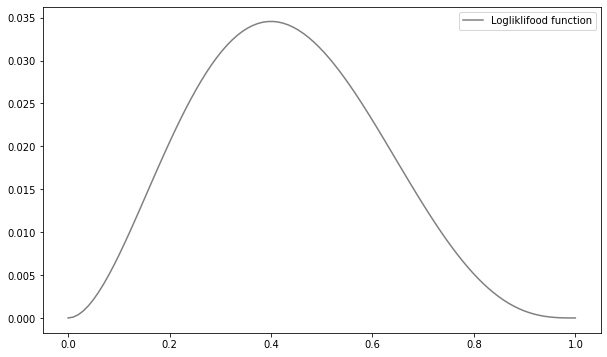

In [20]:
ps = np.linspace(0, 1, 100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result)) for prob in ps]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(ps, Ls, label="Logliklifood function", color="gray")
ax.legend()
plt.show()


In [21]:
# p = 0.4 : 最も尤もらしい母数

In [22]:
prob = 0.4
rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf([0, 1, 0, 0, 1])))
mll
# 出力結果
# -3.365


-3.365058335046282

In [23]:
v = unexp_var / n # 分散
sv = np.sqrt(v) # 標準偏差
rv = stats.norm(y_hat, sv)
mll = np.sum(np.log(rv.pdf(y)))
mll
# 出力結果
# -76.423


-76.42290366872548

In [24]:
# ========================================

In [25]:
# 対数尤度のような当てはまりの良さを基準にすると、汎化性能の悪いモデルが選ばれてしまう恐れがある
# AIC(赤池情報量基準) という指標は、モデルの複雑さ ( 説明変数の数 ) とデータへの適合度とのバランスをとった指標

In [26]:
aic = -2 * mll + 2 * (p+1)
aic
# 出力結果
# 156.846


156.84580733745096

In [27]:
bic = -2 * mll + np.log(n) * (p+1)
bic
# 出力結果
# 158.837


158.83727188455896

In [28]:
# 週間売上 ~ monday_sales + customer traffic : 156.1 が一番良い！